Importing the Dataset

In [ ]:
import tensorflow as tf
(x_train, y_train) ,(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

Displaying the Dataset

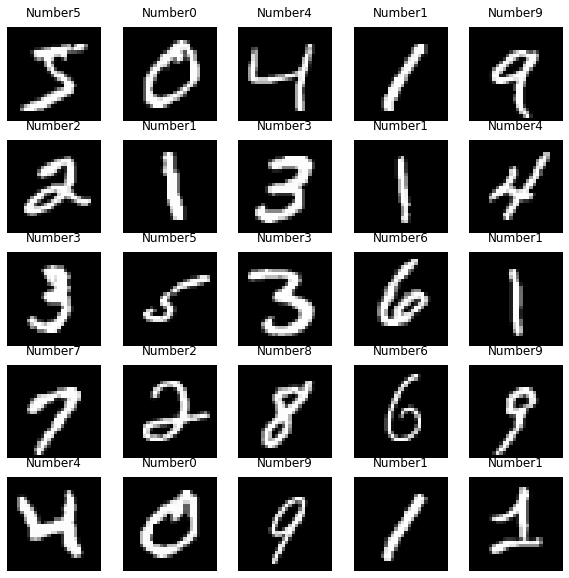

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(5, 5, figsize = (10,10))
plt.gray()
for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number{}'.format(y_train[i]))
  fig.show()


Preprocessing the Data

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape=(28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:',x_train.shape)
print('Number of images in x_train:',x_train.shape[0])
print('Number of images in x_test:',x_test.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of images in x_train: 60000
Number of images in x_test: 10000


Building the Model and adding layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D
model = Sequential()

#convolutional layer
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

#hidden layer
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))

#output layer
model.add(Dense(10, activation = tf.nn.softmax))

Compiling the Model(Training)

In [ ]:
#compling
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#traing the  model
model.fit(x = x_train, y = y_train, epochs =10)

Epoch 1/10
1875/1875 [==============================] - 34s 17ms/step - loss: 2.3015 - accuracy: 0.1120
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 33s 18ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 10/10
1875/1875 [==============================] - 33s 17m

Evaluating the Model

In [ ]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 2s 7ms/step - loss: 2.3012 - accuracy: 0.1135


[2.3012382984161377, 0.11349999904632568]